# Stock Market Analysis

@Kunal Srivastava 2020

I am looking at data from the stock market, particularly some technology stocks. I will also be predicting future stock prices through a Long Short Term Memory (LSTM) network algorithm

This will be achieved through the following outline
    - visualize
    - analyze relationships
    - assess risk
    - predict

In [1]:
#imports
import math
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import array
from datetime import datetime
from pandas_datareader.data import DataReader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# VISUALIZE

In [2]:
# the stocks to use for this analysis
tech_list = ['GOOG', 'AMZN', 'MSFT', 'AAPL']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:   
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
company_list = [GOOG, AMZN, MSFT, AAPL]
company_name = ["GOOGLE", "AMAZON", "MICROSOFT", "APPLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

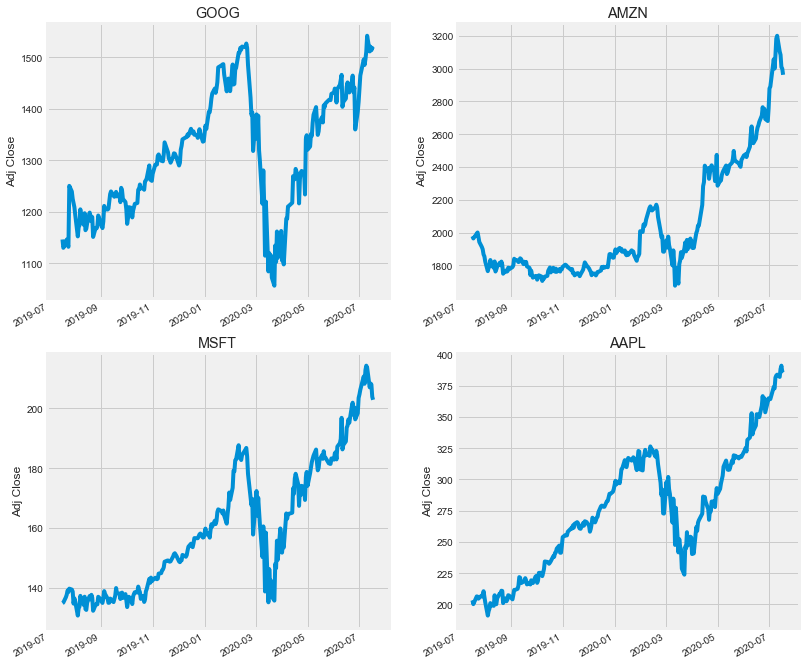

In [4]:
# HISTORICAL VIEW OF CLOSING PRICE

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

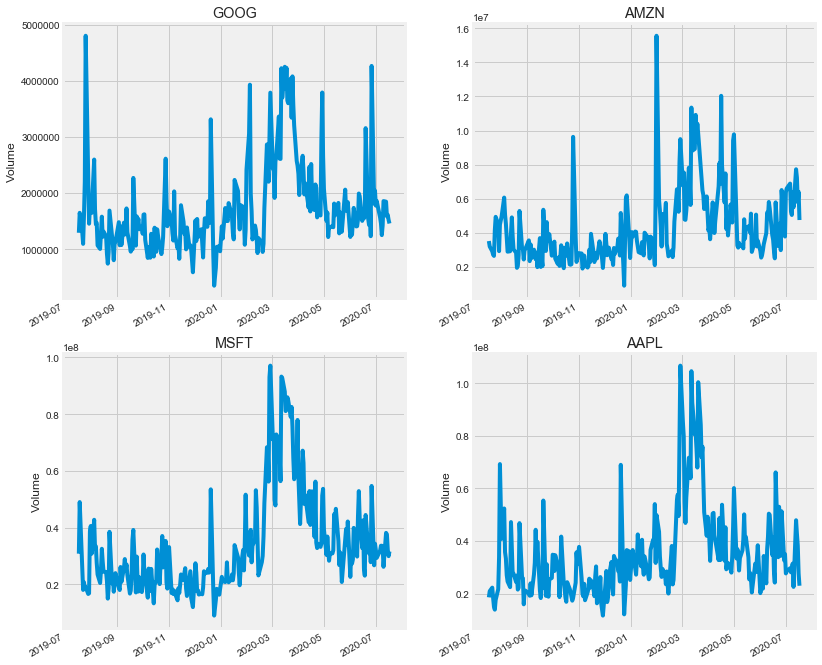

In [5]:
# HISTORICAL VIEW OF TOTAL VOLUME TRADED PER DAY

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

# ANALYZE RELATIONSHIPS

In [6]:
# grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head() 

Symbols,GOOG,AMZN,MSFT,AAPL
Date,,,,
2019-07-18,1146.329956,1977.900024,134.761719,203.234497
2019-07-19,1130.099976,1964.520020,134.959274,200.200699
2019-07-22,1138.069946,1985.630005,136.747269,204.776108
2019-07-23,1146.209961,1994.489990,137.596817,206.376984
2019-07-24,1137.810059,2000.810059,139.009445,206.209015


In [7]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,GOOG,AMZN,MSFT,AAPL
Date,,,,
2019-07-18,NaN,NaN,NaN,NaN
2019-07-19,-0.014158,-0.006765,0.001466,-0.014928
2019-07-22,0.007052,0.010746,0.013248,0.022854
2019-07-23,0.007152,0.004462,0.006213,0.007818
2019-07-24,-0.007328,0.003169,0.010266,-0.000814


DAILY PERCENTAGE RETURN OF EACH MAIN STOCK

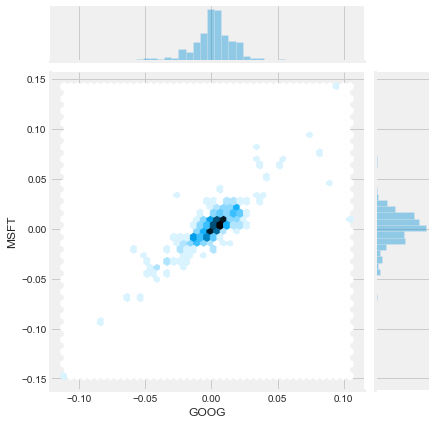

In [8]:
# i use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='hex')

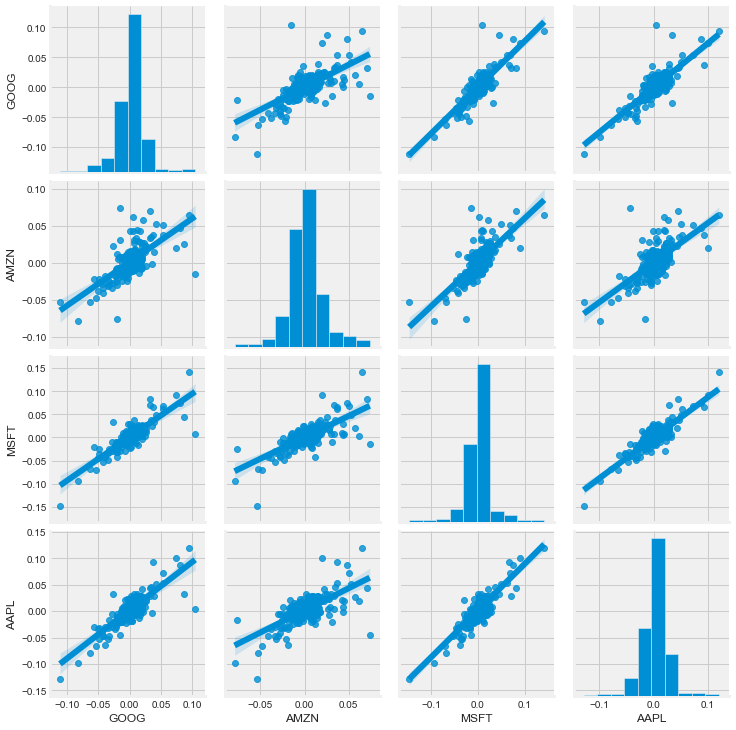

In [9]:
sns.pairplot(tech_rets, kind='reg')
#CROSS STOCK ANALYSIS

# ASSESS RISK

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

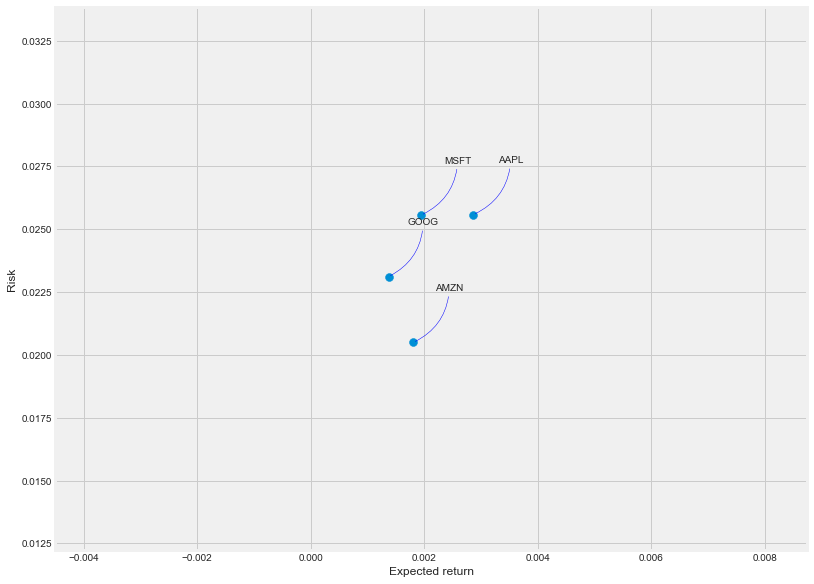

In [10]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# PREDICT

### Stock Market Forecasting Using Stacked LSTM

In [11]:
#CHANGE
STOCK = 'MSFT'

In [12]:
#Get the stock quote
df = DataReader(STOCK, data_source='yahoo', start='2012-01-01', end=datetime.now())

In [13]:
#see what this data looks like
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.959635
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.476425
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.706108
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.058842
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.755325


In [14]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-13,215.800003,206.500000,214.479996,207.070007,38135600.0,207.070007
2020-07-14,208.850006,202.029999,206.130005,208.350006,37591800.0,208.350006
2020-07-15,211.330002,205.029999,209.559998,208.039993,32179400.0,208.039993
2020-07-16,205.699997,202.309998,205.399994,203.919998,29940700.0,203.919998
2020-07-17,205.039993,201.389999,204.470001,202.880005,31588600.0,202.880005


In [15]:
df1=df.reset_index()['Close']

Text(0.5, 1.0, 'Past Stock Value at Daily Close')

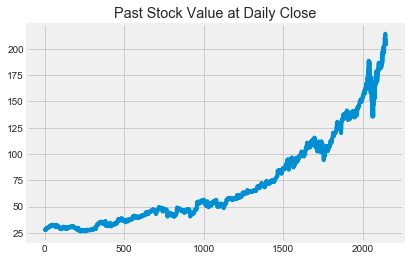

In [16]:
plt.plot(df1)
plt.title("Past Stock Value at Daily Close")

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
21/21 [==============================] - 5s 217ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 2/50
21/21 [==============================] - 3s 148ms/step - loss: 1.7571e-04 - val_loss: 0.0015
Epoch 3/50
21/21 [==============================] - 4s 187ms/step - loss: 8.4747e-05 - val_loss: 0.0017
Epoch 4/50
21/21 [==============================] - 7s 346ms/step - loss: 7.4562e-05 - val_loss: 0.0016
Epoch 5/50
21/21 [==============================] - 9s 439ms/step - loss: 7.2774e-05 - val_loss: 0.0014
Epoch 6/50
21/21 [==============================] - 5s 257ms/step - loss: 7.3123e-05 - val_loss: 0.0017
Epoch 7/50
21/21 [==============================] - 4s 189ms/step - loss: 7.0738e-05 - val_loss: 0.0015
Epoch 8/50
21/21 [==============================] - 4s 174ms/step - loss: 6.8527e-05 - val_loss: 0.0013
Epoch 9/50
21/21 [==============================] - 4s 167ms/step - loss: 7.4302e-05 - val_loss: 0.0013
Epoch 10/50
21/21 [==============================] - 3s 165ms/step -

In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

46.07359962216909

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

127.41376242859913

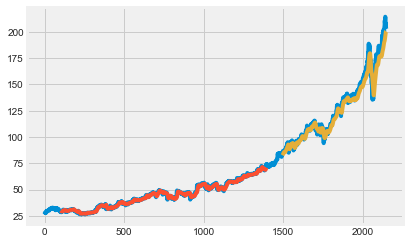

In [29]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

As you can see from above, the yellow is my training. I will attempt to apply it to a 30-day prediction below

In [30]:
x_input=test_data[(len(test_data)-100):].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[[0.9205742478370667], [0.9142774939537048], [0.9063005447387695], [0.8972814679145813], [0.8877459168434143], [0.8780723214149475], [0.8685071468353271], [0.8591973781585693], [0.8502211570739746], [0.8416149020195007], [0.8333885669708252], [0.8255388736724854], [0.8180537819862366], [0.8109180331230164], [0.8041133880615234], [0.7976205945014954], [0.7914190292358398], [0.7854875922203064], [0.7798052430152893], [0.7743510603904724], [0.7691048383712769], [0.7640469670295715], [0.7591593861579895], [0.7544252276420593], [0.7498289942741394], [0.745356559753418], [0.7409958839416504], [0.7367357611656189], [0.7325671315193176], [0.7284818887710571]]


In [33]:
day_new=np.arange(1,101)
print(x_input.shape)
day_pred=np.arange(101,131)

(1, 100, 1)


Text(0, 0.5, 'Stock Value ($)')

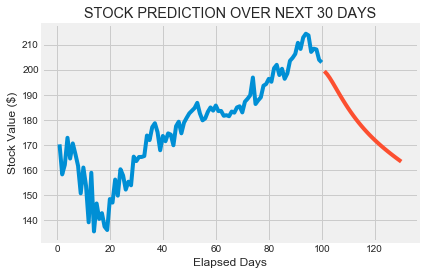

In [34]:
plt.plot(day_new,scaler.inverse_transform(df1[(len(df1)-100):]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title("STOCK PREDICTION OVER NEXT 30 DAYS")
plt.xlabel("Elapsed Days")
plt.ylabel("Stock Value ($)")

In [36]:
print('input length of predicted forecast (1-30): ')
n = int(input())
predictions = scaler.inverse_transform(lst_output)[:n]
print('PREDICTIONS:    \n')
for counter, pred in enumerate(predictions):
    print('day', counter+1, pred[0])


input length of predicted forecast (1-30): 
5
PREDICTIONS:    

day 1 199.3919366901206
day 2 198.20846175690838
day 3 196.7091941002309
day 4 195.01405855263613
day 5 193.22185166697238


# FINAL THOUGHTS

It seems the model is predicting a smooth decline. this makes sense as a second wave of covid-19 may affect businesses. I think the model could be improved by maybe taking a prediction of the next 14 days, rather than 30. the training chart (the graph above this one), shows that my training was spot on, and if given all previous days, my model is VERY strong at predicting the closing price on the next day, given all data from days before. 